In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

C:\Users\USER\AppData\Local\Temp\ipykernel_27320\2011421623.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [5]:
data = pd.read_csv("insurance.csv")
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [11]:
print("The row count of the data set{}".format(data.shape[0]))

The row count of the data set1338


In [7]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [9]:
data.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [15]:
data.duplicated().sum()

0

In [14]:
data.drop_duplicates(inplace = True)

In [26]:
def graficos_eda_categoricos(cat):
    
    #Calculamos el número de filas que necesitamos
    from math import ceil
    filas = ceil(cat.shape[1] / 2)

    #Definimos el gráfico
    f, ax = plt.subplots(nrows = filas, ncols = 2, figsize = (16, filas * 6))

    #Aplanamos para iterar por el gráfico como si fuera de 1 dimensión en lugar de 2
    ax = ax.flat 

    #Creamos el bucle que va añadiendo gráficos
    for cada, variable in enumerate(cat):
        sns.countplot(data=cat, x=variable, hue=variable, ax=ax[cada], palette='viridis', orient='h')
        ax[cada].set_title(variable, fontsize=12, fontweight="bold")
        ax[cada].tick_params(labelsize=12)
        # Agrega el número de cada muestra sobre las barras
        for p in ax[cada].patches:
            ax[cada].annotate(f"{p.get_height()}", (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

    plt.show()

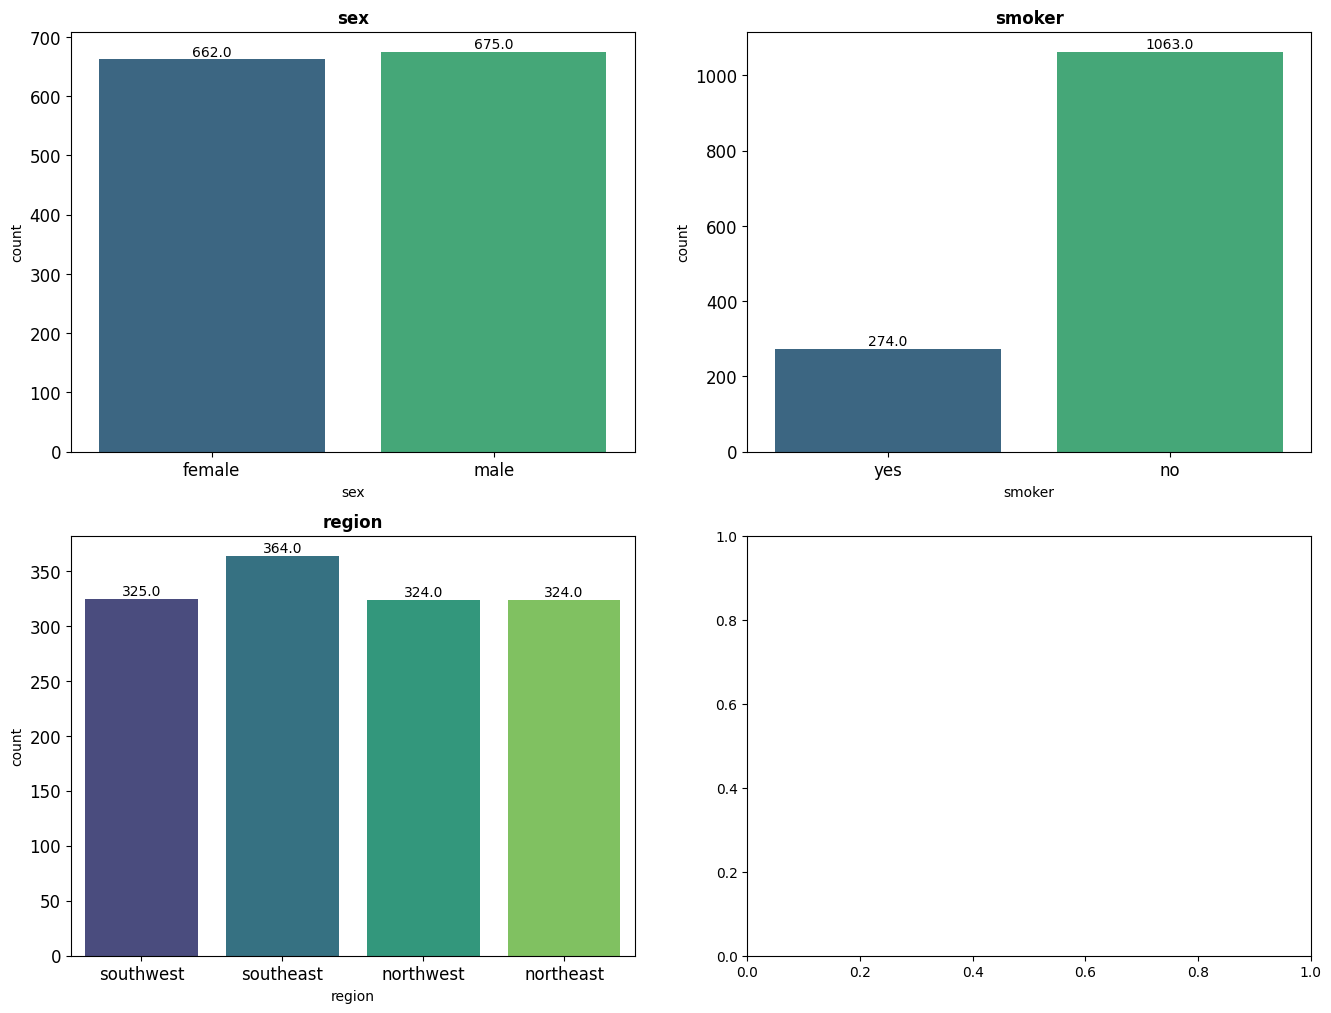

In [27]:
graficos_eda_categoricos(data.select_dtypes('O'))

In [28]:
from sklearn import preprocessing
# En los procesos de Machine Learning no puede haber variables categóricas por lo que se van a preprocesar las muestras para poner una clave a cada valor categórico

In [29]:
labelencoder = preprocessing.LabelEncoder()

In [33]:
data["sex"] = labelencoder.fit_transform(data["sex"])
data["smoker"] = labelencoder.fit_transform(data["smoker"])
data["region"] = labelencoder.fit_transform(data["region"])

In [32]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520


In [34]:
data.corr()["charges"].sort_values(ascending=False)

charges     1.000000
smoker      0.787234
age         0.298308
bmi         0.198401
children    0.067389
sex         0.058044
region     -0.006547
Name: charges, dtype: float64

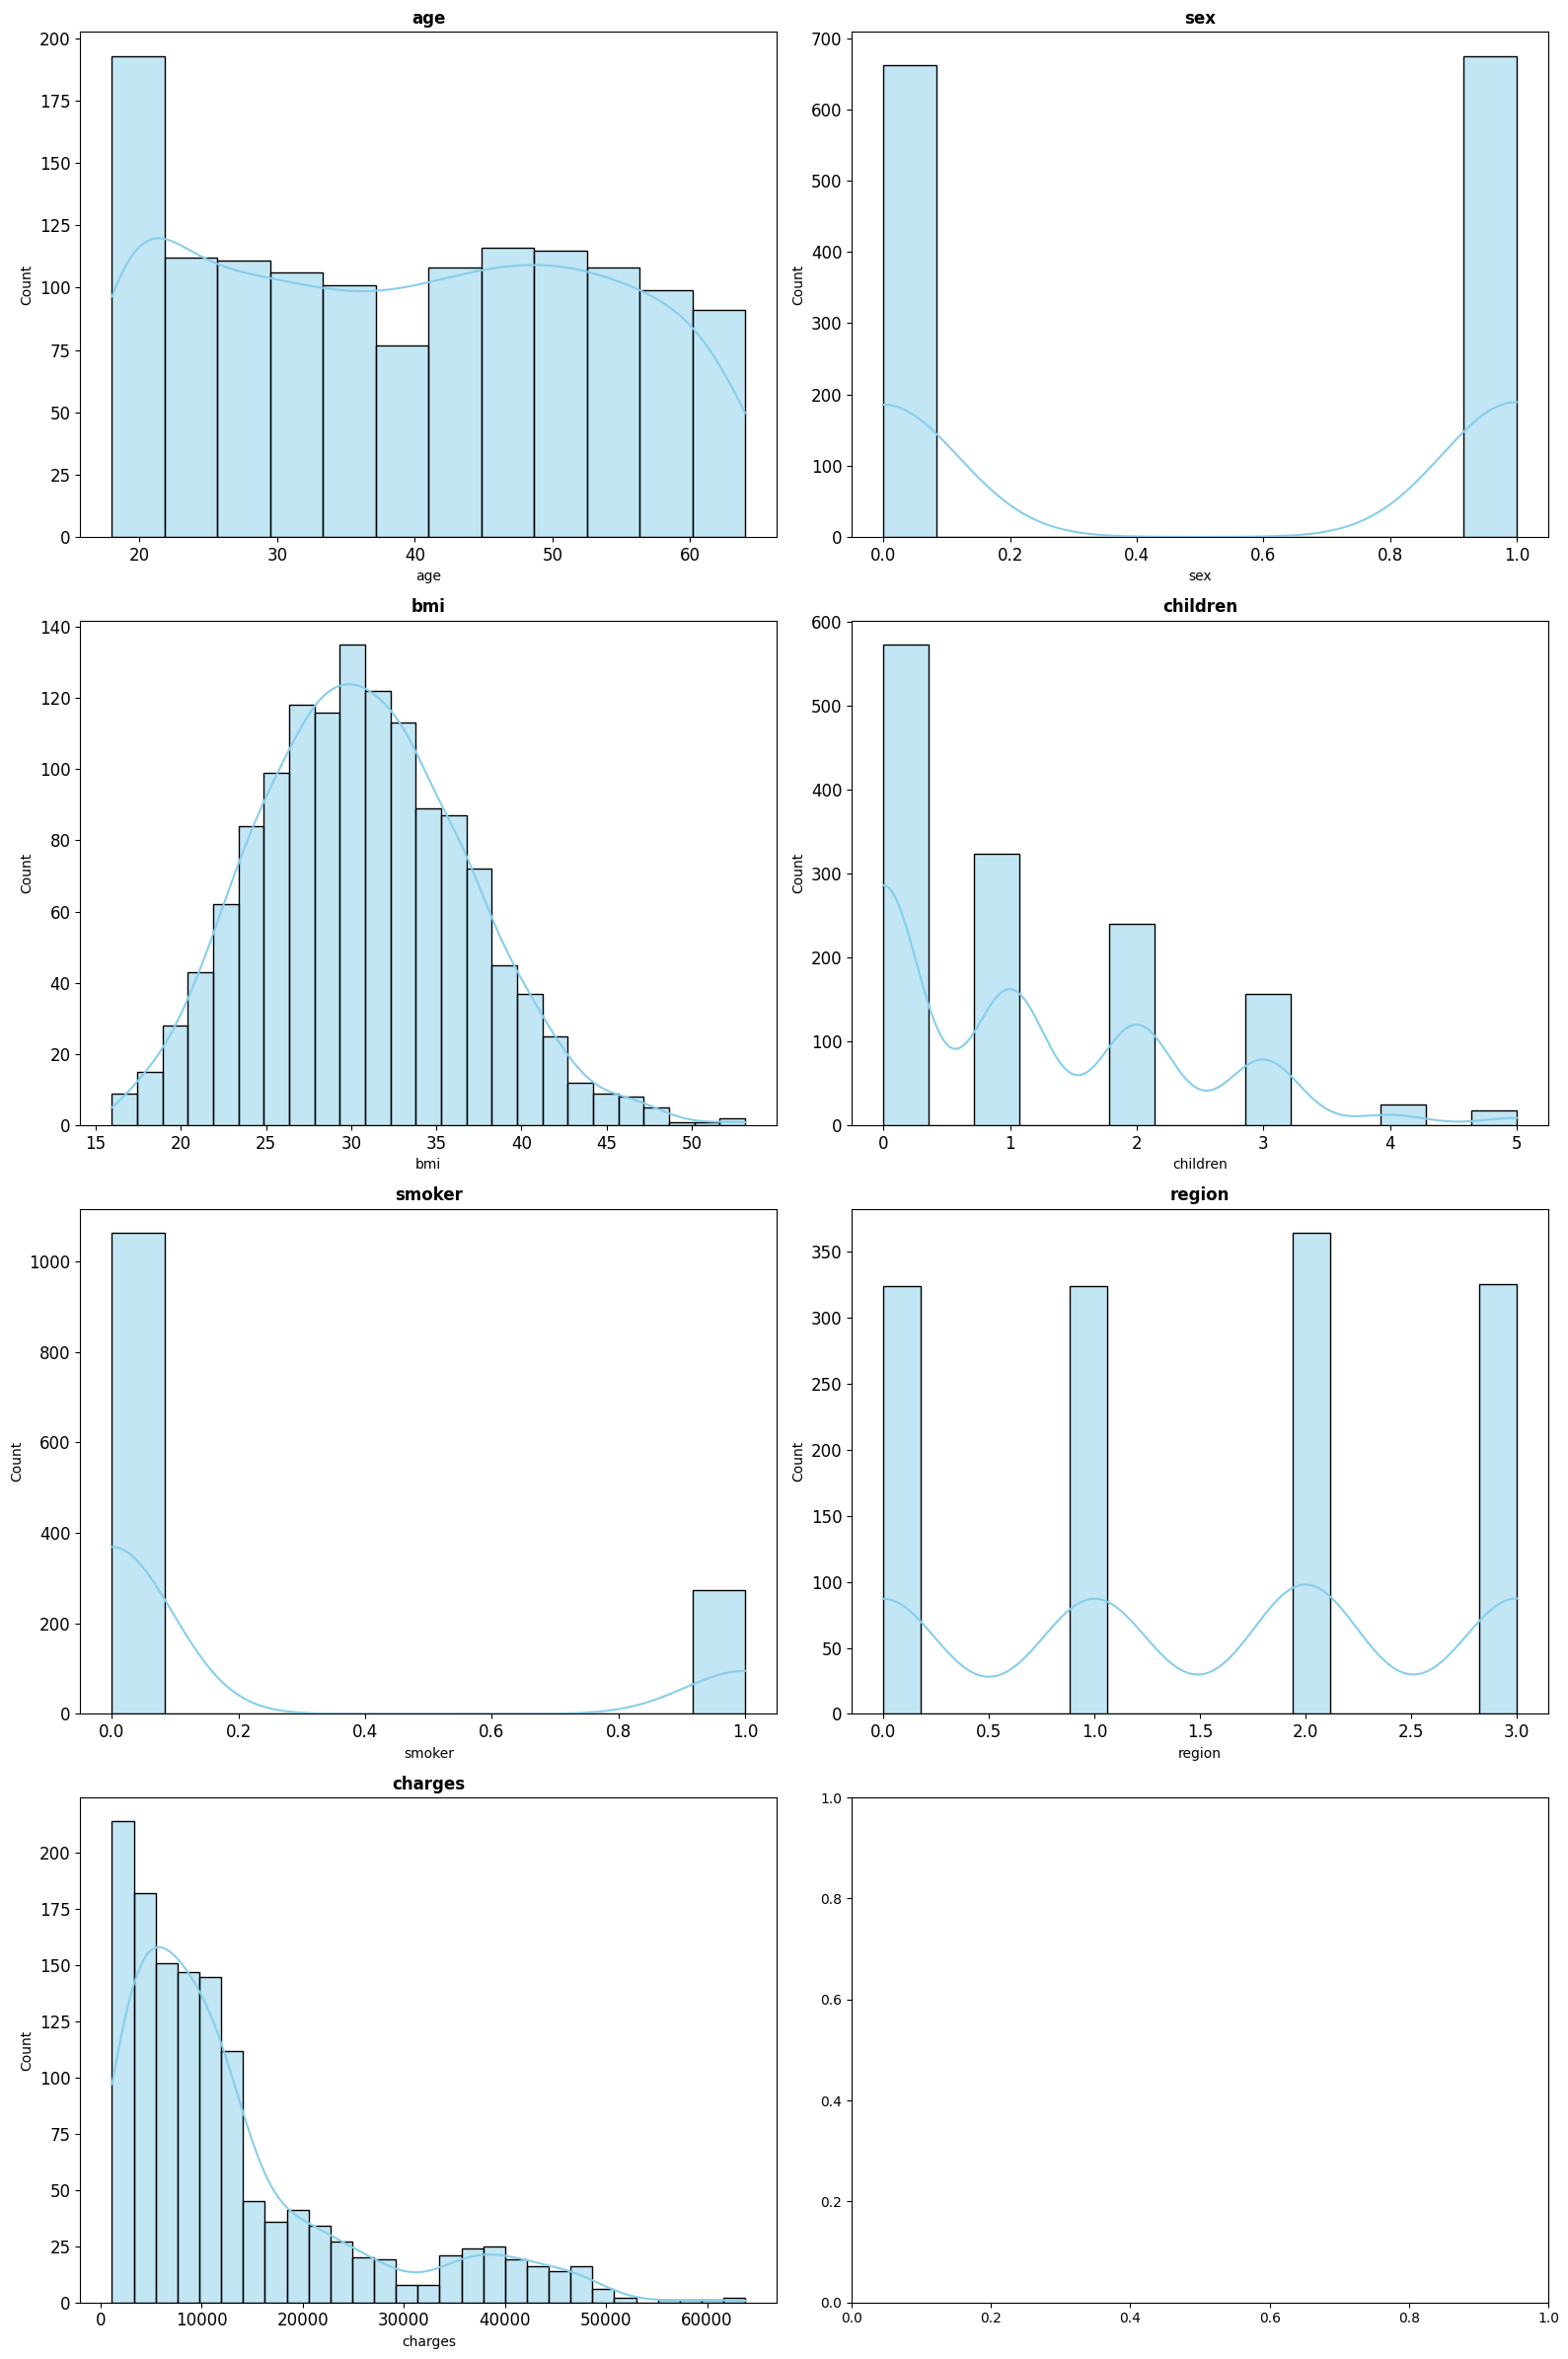

In [47]:
graficos_distribucion(data)

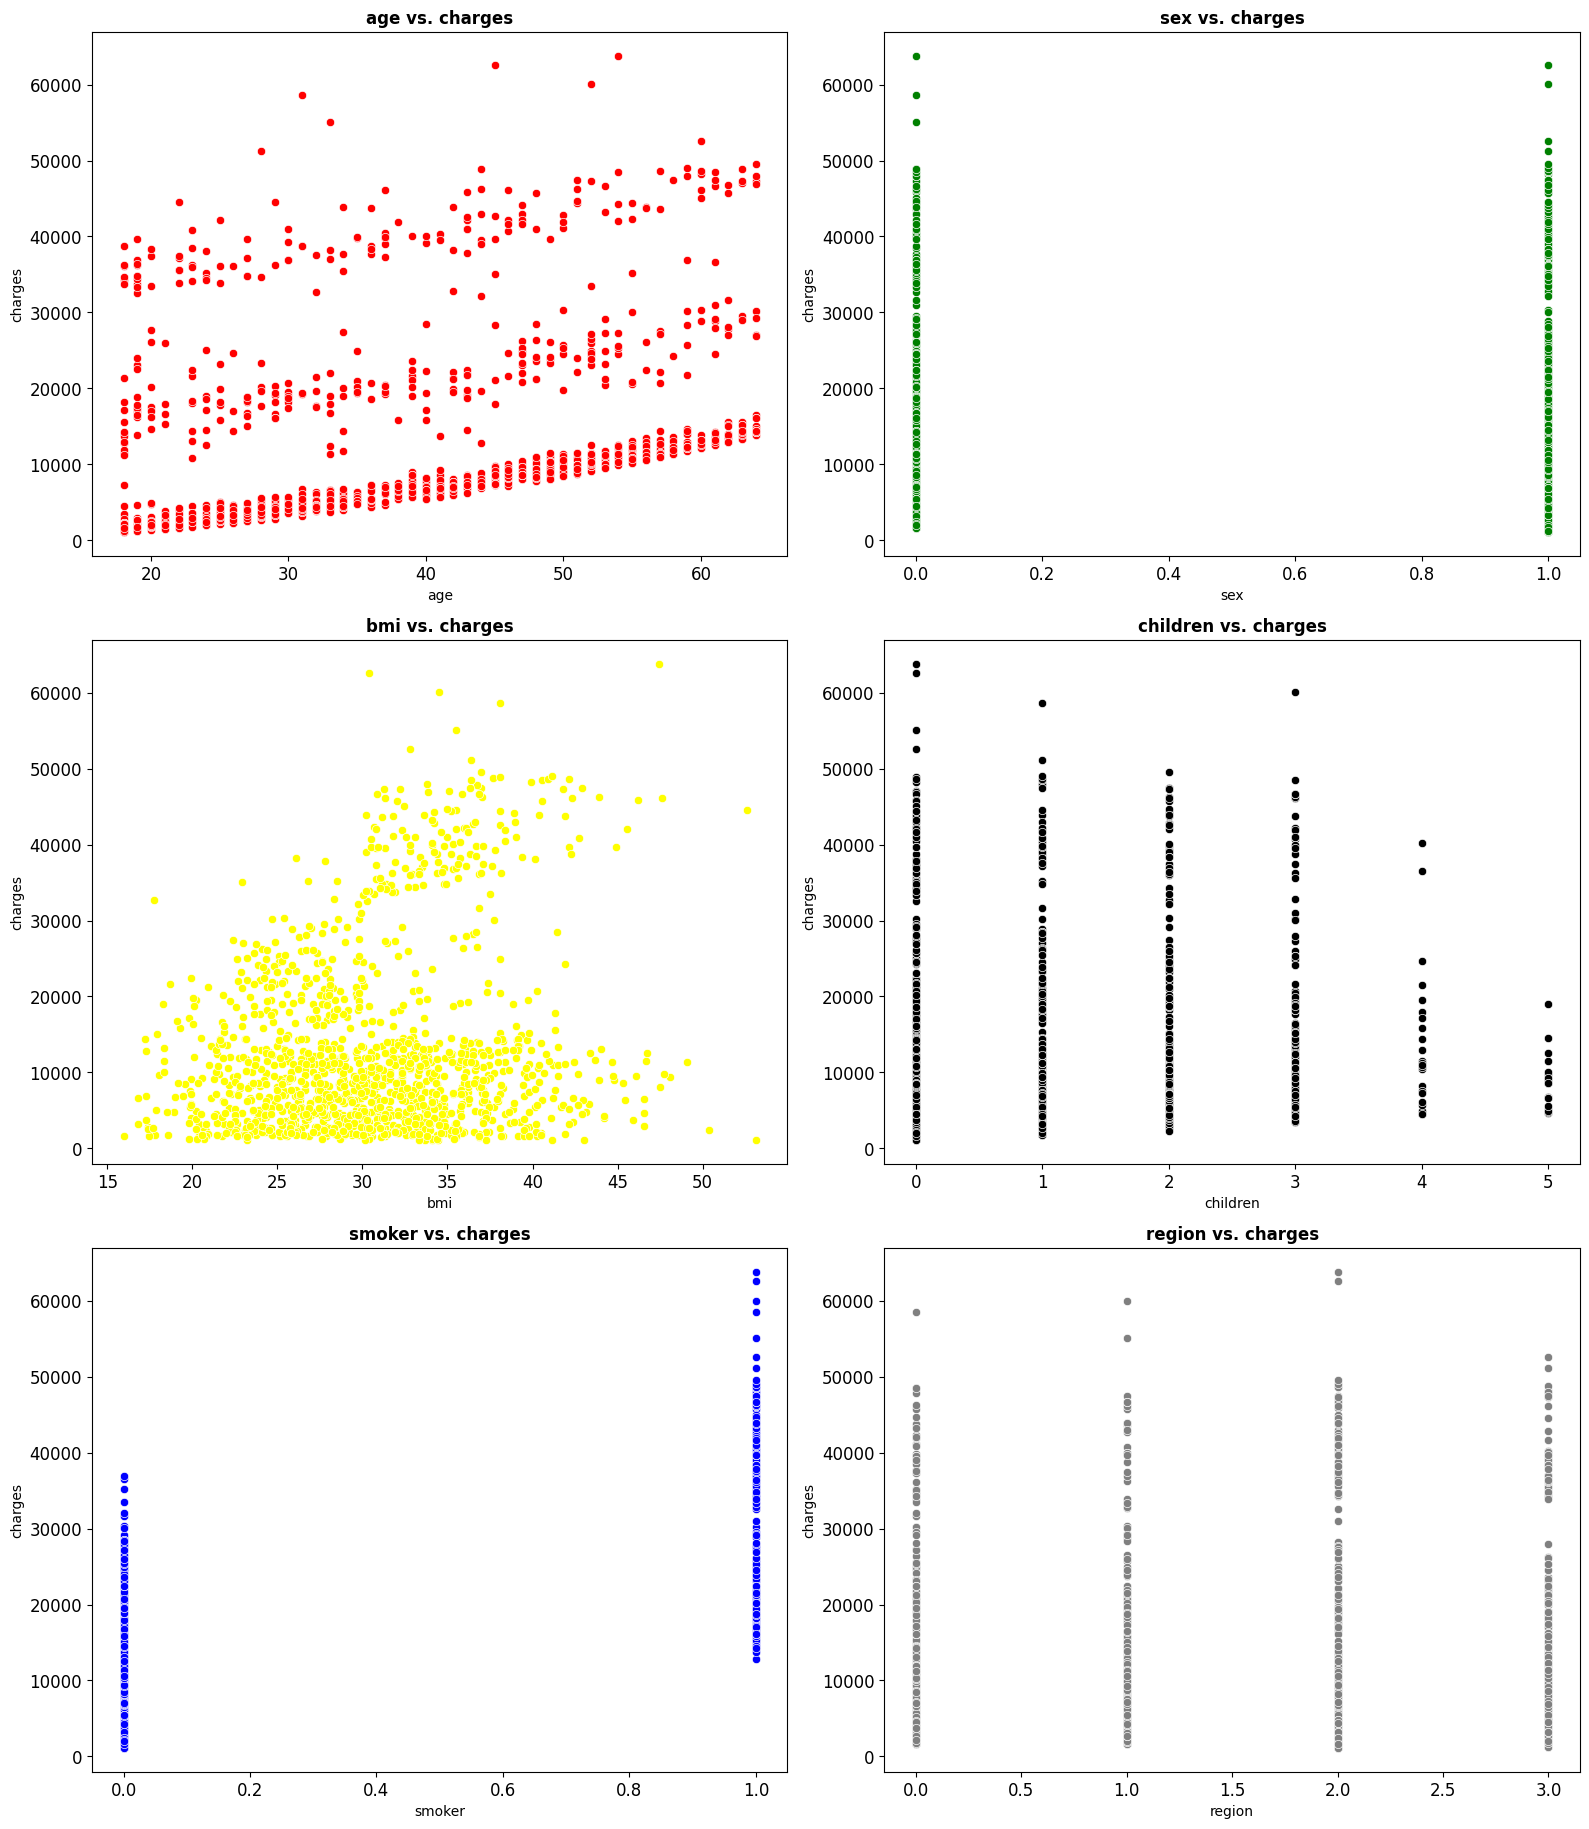

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt

# Supongamos que 'data' es tu DataFrame y 'charges' es la columna objetivo
colorsfork = ["red", "green", "yellow", "black", "blue", "grey"]
colorchanger = 0

# Calculamos el número de filas necesarias para los subplots
num_filas = len(data.columns[:-1]) // 2 + 1

# Creamos los subplots
fig, ax = plt.subplots(nrows=num_filas, ncols=2, figsize=(16, num_filas * 6))

# Aplanamos el array de ejes para iterar sobre él como si fuera 1D
ax = ax.flat

# Iteramos por las columnas y creamos los gráficos de dispersión
for i, columna in enumerate(data.columns[:-1]):
    sns.scatterplot(data=data, x=columna, y="charges", color=colorsfork[colorchanger], ax=ax[i])
    ax[i].set_title(f"{columna} vs. charges", fontsize=12, fontweight="bold")
    ax[i].tick_params(labelsize=12)
    colorchanger += 1

# Eliminamos los subplots no utilizados
for j in range(len(data.columns[:-1]), num_filas * 2):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()
